# Daten Visualisierung mit Python, Pandas und Matplotlib

In diesem Tutorial wird gezeigt wie mehrere Tabellen in Pandas miteinander verknüpft werden können und diese dann graphisch mit dem Python Paket [Matplotlib](https://matplotlib.org/stable/index.html) visualisiert werden können. Für weitergehende Informationen werden das [Matplotlib pyplot Tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) sowie die Pandas Tutorials [How to create plots in pandas?
](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/04_plotting.html), [How to combine data from multiple tables?](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html) und [How to handle time series data with ease?](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/09_timeseries.html) empfohlen.

Zunächst müssen alle benötigten Pakete installiert werden mit `pip`

In [6]:
!pip install pandas matplotlib requests

import requests
import pandas as pd
import matplotlib.pyplot as plt
import requests

Im folgenden werden die Torjäger der 1. Bundesliga aus den letzten 10 Jahren über OpenLigaDB geladen und in einem Pandas DataFrame gespeichert. 

In [19]:
import requests

torjaeger = pd.DataFrame()

for jahr in range(2000,2020):
    print(f"Rufe Torjäger des Jahres {jahr} ab")
    antwort = requests.get(f"https://www.openligadb.de/api/getgoalgetters/bl1/{jahr}")
    print(f"Erstelle DataFrame und füge Jahr {jahr} als neue Spalte hinzu")
    df = pd.DataFrame(antwort.json())
    df['jahr'] = jahr
    print("Füge Zeilen (axis=0) von DataFrame df und DataFrame torjaeger zusammen")
    torjaeger = pd.concat([torjaeger, df], axis=0)

<AxesSubplot:>

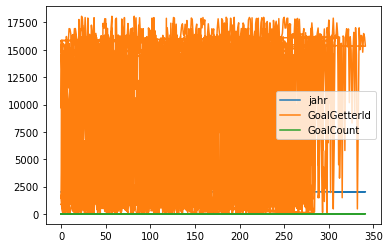

In [20]:
torjaeger.plot()